Laden der beiden Excel Tabellen: Sportlerauflistung und Längen-/Breitengrade der Geburtsorte

In [601]:
fname = 'Sportlerauflistung_gesamt_20220314_anonymisiert-OTH-Amberg_sta.xlsx'

In [602]:
fname2 = 'longilatBirth.xlsx'

Laden verschiedener Bibliotheken: pandas, re fuer regular expressions, numpy fuer das Lesen der Laengen- und Breitengrad Tabelle aufgrund mathematischer Zahlen, matplotlib für erste Visualisierungen

In [603]:
import pandas as pd

In [604]:
import numpy as np

In [605]:
import re

In [606]:
import matplotlib.pyplot as plt

Einlesen der Excel-Tabellen und anschließend kombinieren der Tabellen df1 und df2 zu einer Tabelle

In [607]:
df1 = pd.read_excel(fname)

In [608]:
longlatdf = pd.read_excel(fname2)

In [609]:
df2 = pd.read_excel(fname, 'Paralympische Sportler')

In [610]:
df = pd.concat([df1, df2], sort=False)

Erste Zeile mit Index 0 wird geloescht, in den Spalten "Jahr" und "Orte" werden leere Zellen aufgefüllt 

In [611]:
df.drop(index=0,inplace=True)

In [612]:
df[['Jahr']] = df[['Jahr']].fillna(method='ffill')

In [613]:
df[['Orte']] = df[['Orte']].fillna(method='ffill')

Spalte "Olympische Spiele" wird geloescht, da die Nummerierung der Spiele nicht relevant, leere Eintraege(NaN) in der Spalte "Nachname" werden geloescht

In [614]:
df.drop('Olympische Spiele', axis=1, inplace=True)

In [615]:
df = df.dropna(subset=['Nachname']) 

In der Tabelle werden zwei neue Spalten eingefuegt, die jeweils die Anzahl der Medaillen pro Sportart und pro Bezirk beinhalten. Daraus werden zwei Diagramme gemacht, um einen Einblick zu bekommen.

In [616]:
df['MedProSport'] = 1
AnzMedDF = df.groupby(['Sportart','Medaille'])['MedProSport'].sum().reset_index()

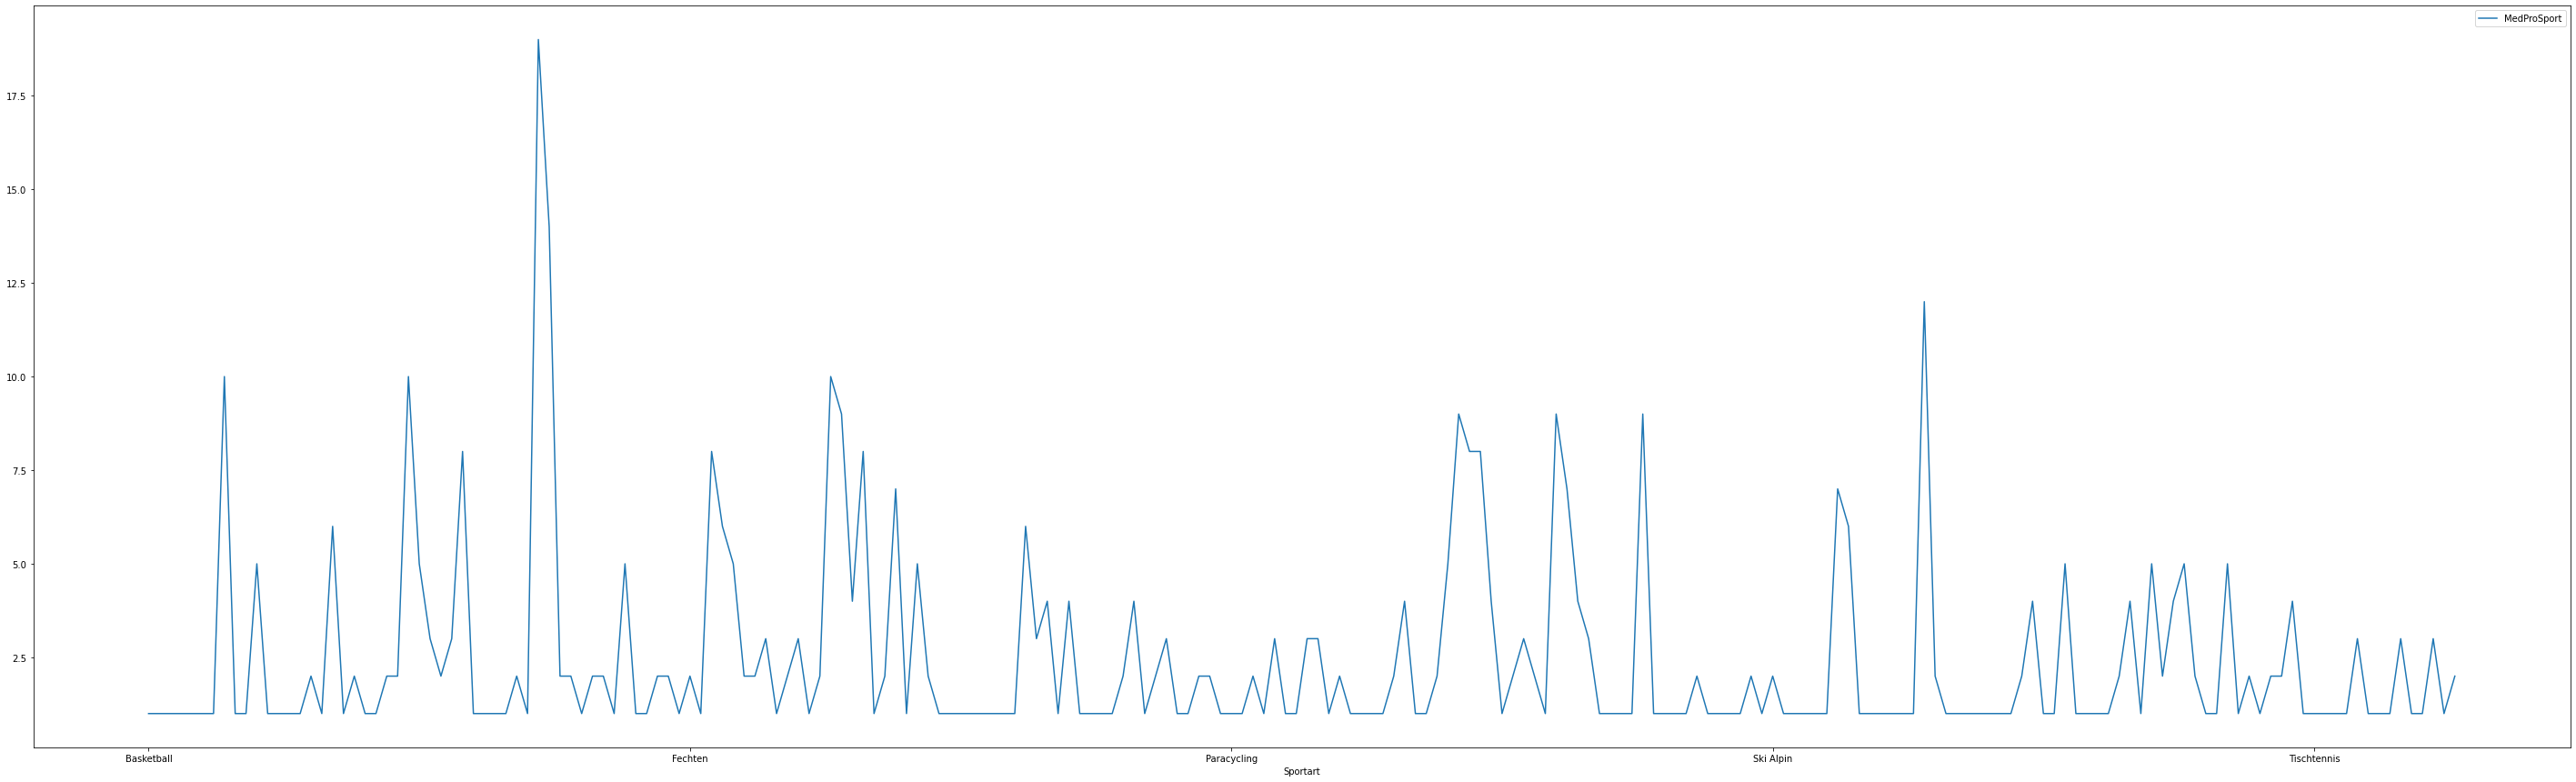

In [617]:
AnzMedDF.plot(x="Sportart", y=["MedProSport"], figsize=(50,15))
plt.show()

In [618]:
df['MedProOrt'] = 1
AnzMedDF2 = df.groupby(['Bezirk','Medaille'])['MedProOrt'].sum().reset_index()

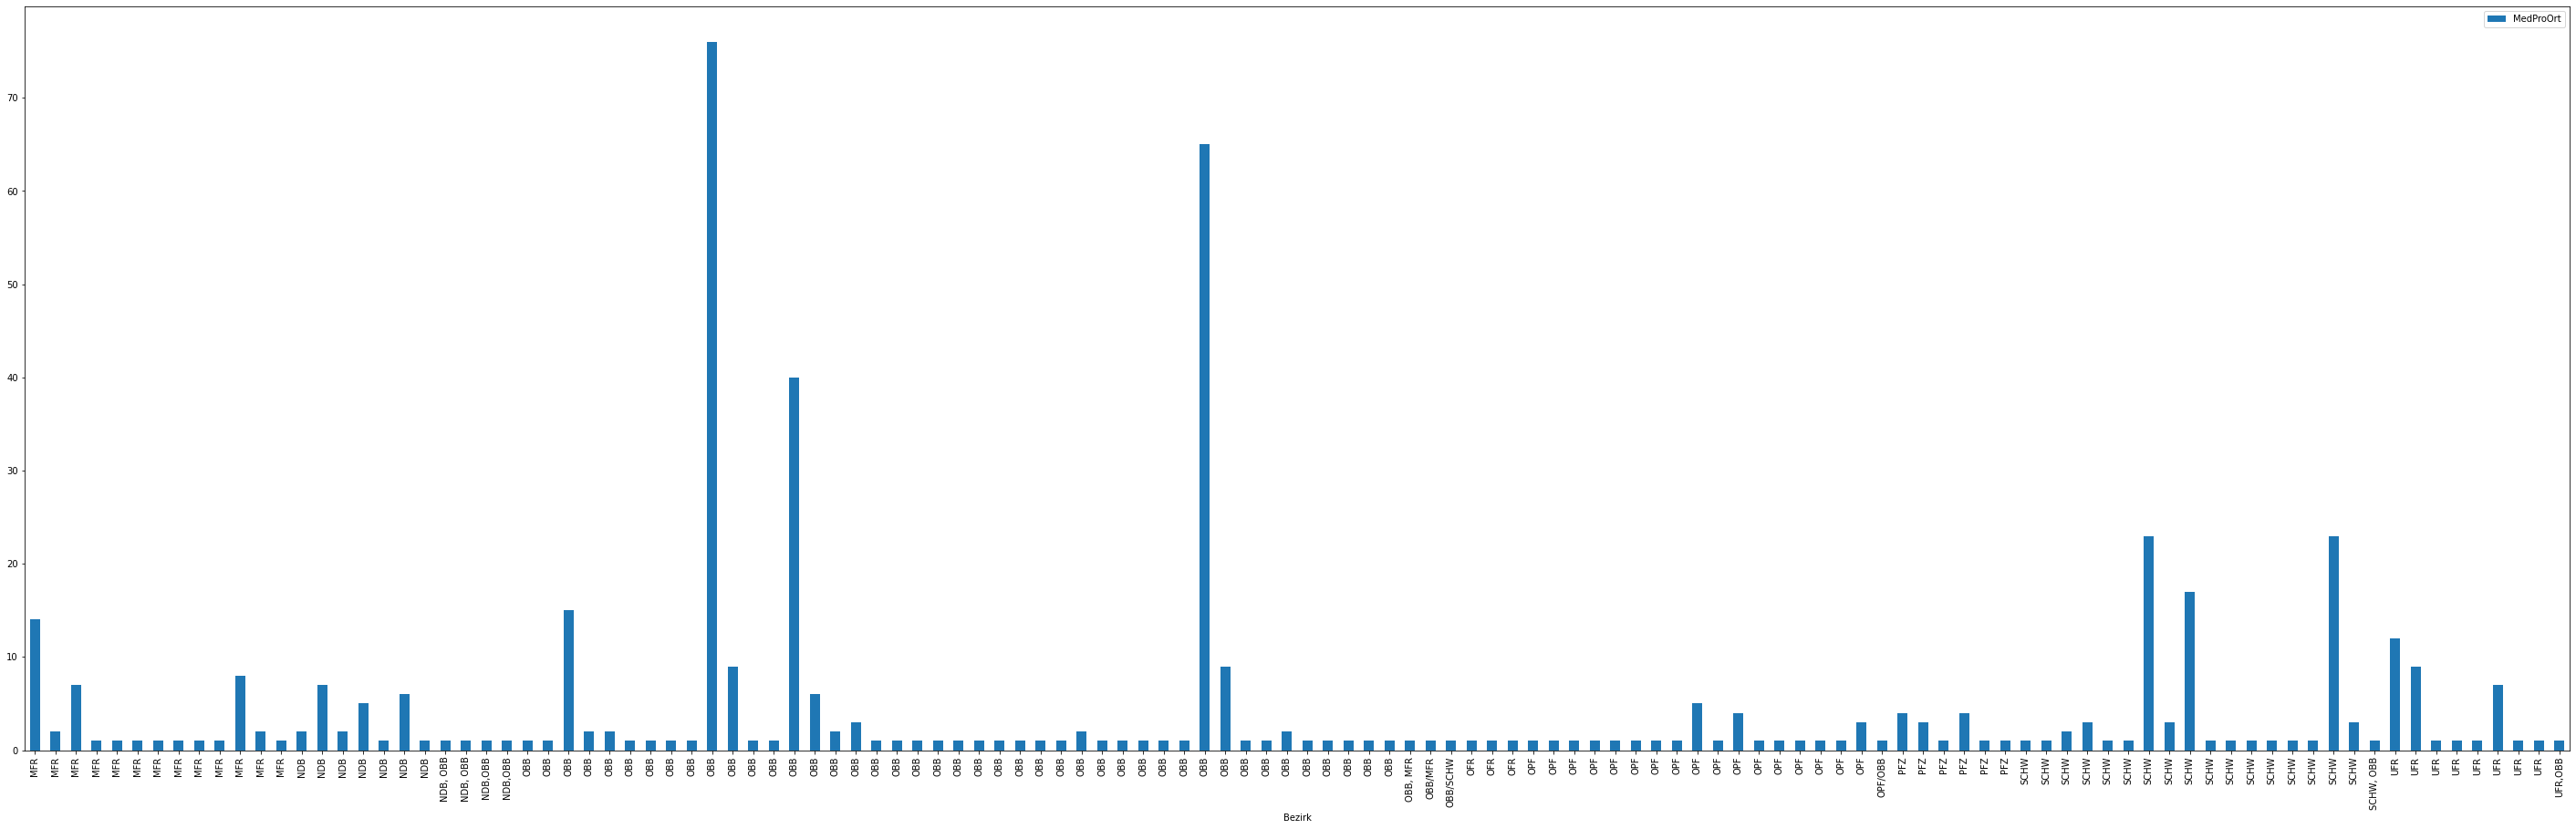

In [619]:
AnzMedDF2.plot(x="Bezirk", y=["MedProOrt"], kind = 'bar', figsize=(50,15))
plt.show()

Nach erstem Einblick wird eine neue Tabelle erstellt mit Spalten, die ich verwenden will

In [620]:
columnsNeeded_df = df.filter(["Jahr", "Orte", "Bezirk","Geburtsort", "Medaille", "Sportart", "Disziplin"])

in der Spalte "Medaille" werden leere Eintraege (NaN) geloescht

In [621]:
columnsNeeded_df.dropna(subset=['Medaille'], inplace=True)

Zeile 20: in der Spalte "Bezirk" wird das Trennzeichen "," zu "/" geaendert

In [622]:
columnsNeeded_df['Bezirk'] = columnsNeeded_df['Bezirk'].str.replace(r',','/')

Anschließend wird der jeweilige String-Eintrag durch "/" geteilt z.B. MFR/UFR und das erste Wort mit str[0] verwendet

In [623]:
columnsNeeded_df['Bezirk'] = columnsNeeded_df['Bezirk'].str.split('/').str[0]

in der Spalte "Bezirk" werden leere Eintraege (NaN) geloescht

In [625]:
columnsNeeded_df.dropna(subset=['Bezirk'], inplace=True)

Array mit bestimmten Woertern erstellt, um danach in der Spalte "Medaille" genau diese herauszufiltern (Zeile 25)

In [626]:
mylist = ['Gold', 'Silber', 'Bronze']

In [627]:
columnsNeeded_df['Medaille'] = columnsNeeded_df['Medaille'].str.extract('('+'|'.join(mylist)+')',expand=False)

Spalte "Bezirk" wird nun als Index fuer die Tabelle verwendet

In [629]:
BezirkIndex = columnsNeeded_df.set_index("Bezirk")

In [630]:
BezirkIndex

,Jahr,Orte,Geburtsort,Medaille,Sportart,Disziplin
Bezirk,,,,,,
PFZ,1900.0,Paris (F),Biberach,Bronze,Rudern,4er mit Steuermann
PFZ,1900.0,Paris (F),Ludwigshafen,Bronze,Rudern,4er mit Steuermann
PFZ,1900.0,Paris (F),Eriskirch,Bronze,Rudern,4er mit Steuermann
PFZ,1900.0,Paris (F),Flomersheim,Bronze,Rudern,4er mit Steuermann
OBB,1908.0,London (GB),München,Gold,Eiskunstlauf,Paarlauf
...,...,...,...,...,...,...
NDB,2021,Tokio (JAP),Zwiesel,Silber,Tischtennis,"Einzel, Team"
SCHW,2021,Tokio (JAP),Lindau,Silber,Tischtennis,Team
OBB,2021,Tokio (JAP),Chemnitz,Bronze,Paracycling,Einerverfolgung


In den folgenden Codezeilen wird für jeden Bezirk eine Tabelle, bestehend aus den Zeilen von "BezirkIndex", erstellt, anschließend werden die Eintraege nach den Jahreszahlen aus Spalte "Jahr" sortiert

In [631]:
MittelfrankenOnly = BezirkIndex.loc["MFR"]
Mittelfranken = MittelfrankenOnly.sort_values('Jahr')

In [632]:
NiederbayernOnly = BezirkIndex.loc["NDB"]
Niederbayern = NiederbayernOnly.sort_values('Jahr')

Fuer die Tabelle Oberbayern werden zusaetzlich noch leere Eintraege (NaN)  geloescht, da es sonst eine Fehlermeldung geben wuerde

In [633]:
OberbayernOnly = BezirkIndex.loc["OBB"]
Oberbayern = OberbayernOnly.sort_values('Jahr')
Oberbayern.dropna(subset = ['Geburtsort'],inplace=True)

In [634]:
OberfrankenOnly = BezirkIndex.loc["OFR"]
Oberfranken = OberfrankenOnly.sort_values('Jahr')

In [635]:
OberpfalzOnly = BezirkIndex.loc["OPF"]
Oberpfalz = OberpfalzOnly.sort_values('Jahr')

In [636]:
SchwabenOnly = BezirkIndex.loc["SCHW"]
Schwaben = SchwabenOnly.sort_values('Jahr')

In [637]:
UnterfrankenOnly = BezirkIndex.loc["UFR"]
Unterfranken = UnterfrankenOnly.sort_values('Jahr')

Nachdem fuer jeden Bezirk eine Tabelle erstellt wurde, werden alle Tabellen miteinander zu einer Tabelle kombiniert

In [638]:
finalDF = pd.concat([Mittelfranken, Niederbayern, Oberbayern, Oberfranken, Oberpfalz, Schwaben, Unterfranken])

Variable fuer die Spalte Latitude, Longitude und Bezirk aus der Laengen- und Breitengrad Exceltabelle wird erstellt, damit diese Spalten in die finale Tabelle mit den Regierungsbezirken eingefuegt werden kann

In [639]:
LatitudeCol = longlatdf['Latitude']

In [640]:
LongitudeCol = longlatdf['Longitude']

In [641]:
BezirkNeu = longlatdf['Bezirk']

Index von der Laengen- und Breitengrad Tabelle wird wieder fuer die finale Tabelle verwendet, da Bezirk nun als Index nicht mehr notwendig ist

In [642]:
finalDF = finalDF.set_index(longlatdf.index) 

in die finale Tabelle werden 2 neue Spalten nach der dritten und vierten Spalte eingefuegt, die jeweils den Inhalt aus der Latitude und Longitude Variable enthalten. Auch eine neue Spalte fuer den Bezirk wird eingefuegt, da die vorherige Bezirk Spalte durch neuen Index ersetzt wurde

In [643]:
finalDF.insert(loc=3,
          column='Latitude1',
          value=LatitudeCol)

In [644]:
finalDF.insert(loc=4,
          column='Longitude1',
          value=LongitudeCol)

In [645]:
finalDF.insert(loc=0,
          column='Bezirk',
          value=BezirkNeu)

Leere Eintraege (NaN) werden in folgenden Spalten wieder geloescht

In [646]:
finalDF.dropna(subset = ['Latitude1'],inplace=True)

In [647]:
finalDF.dropna(subset = ['Longitude1'],inplace=True)

kurzer Check wie die finale Tabelle nun aussieht

In [648]:
finalDF

,Bezirk,Jahr,Orte,Geburtsort,Latitude1,Longitude1,Medaille,Sportart,Disziplin
0,MFR,1912.0,Stockholm (SWE),Nürnberg,49460.0,11061.0,Silber,Ringen,Federgewicht
1,MFR,1928.0,Amsterdam (NL),Nürnberg,49460.0,11061.0,Gold,Ringen,Bantamgewicht
2,MFR,1928.0,Amsterdam (NL),Nürnberg,49460.0,11061.0,Gold,Wasserball,NaN
4,MFR,1936.0,Berlin (D),Fürth,49452.0,10974.0,Silber,Ringen,Mittelgewicht
5,MFR,1936.0,Berlin (D),Nürnberg,49460.0,11061.0,Gold,Turnen,Mannschaft
...,...,...,...,...,...,...,...,...,...
473,UFR,2008.0,Peking (CHN),Würzburg,49783.0,9933.0,Bronze,Fußball,(Ersatztorhüterin)
474,UFR,2008.0,Peking (CHN),Würzburg,49783.0,9933.0,Bronze,Schwimmen,10km Freiwasser
475,UFR,2012.0,London (GB),Würzburg,49783.0,9933.0,Silber,Schwimmen,Freiwasser
476,UFR,2016.0,Rio de Janeiro (BRA),Alzenau,50089.0,9587.0,Gold,Fußball,NaN


Finale Tabelle hat gepasst, wird nun als CSV Datei zum Weiterverarbeiten exportiert

In [649]:
finalDF.to_csv('OlympiaDataFinal.csv', index=False)